Name:Rutuja Ashok Jagtap 
class:BE
div:A
rollno:27
title:Predict the price of the Uber ride from a given pickup point to the agreed drop-off location.
Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and random forest regression models.
5. Evaluate the models and compare their respective scores like R2, RMSE, etc.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Load the dataset
df = pd.read_csv("Uber.csv") 

df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [54]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [55]:
df=df.drop(['Unnamed: 0','key'],axis=1)

In [56]:
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].mean(),inplace=True)

In [57]:
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace=True)

In [58]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

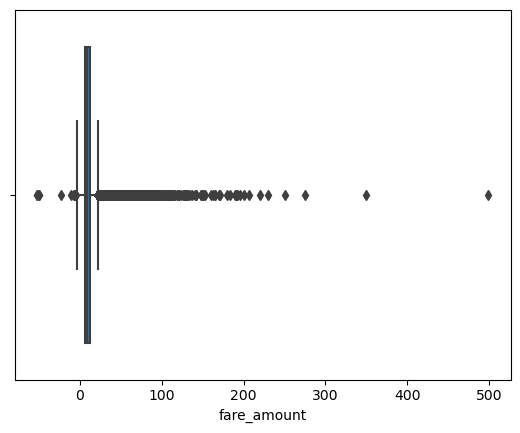

In [59]:
sns.boxplot(x=df["fare_amount"])
plt.show()

In [60]:
Q1 = df["fare_amount"].quantile(0.25)
Q3 = df["fare_amount"].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
data_no_outliers = df[(df["fare_amount"] >= lower_bound) & (df["fare_amount"] <= upper_bound)]

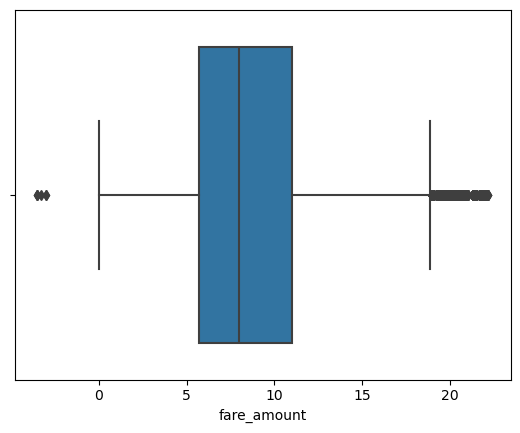

In [61]:
sns.boxplot(x=data_no_outliers["fare_amount"])
plt.show()

fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
dtype: object

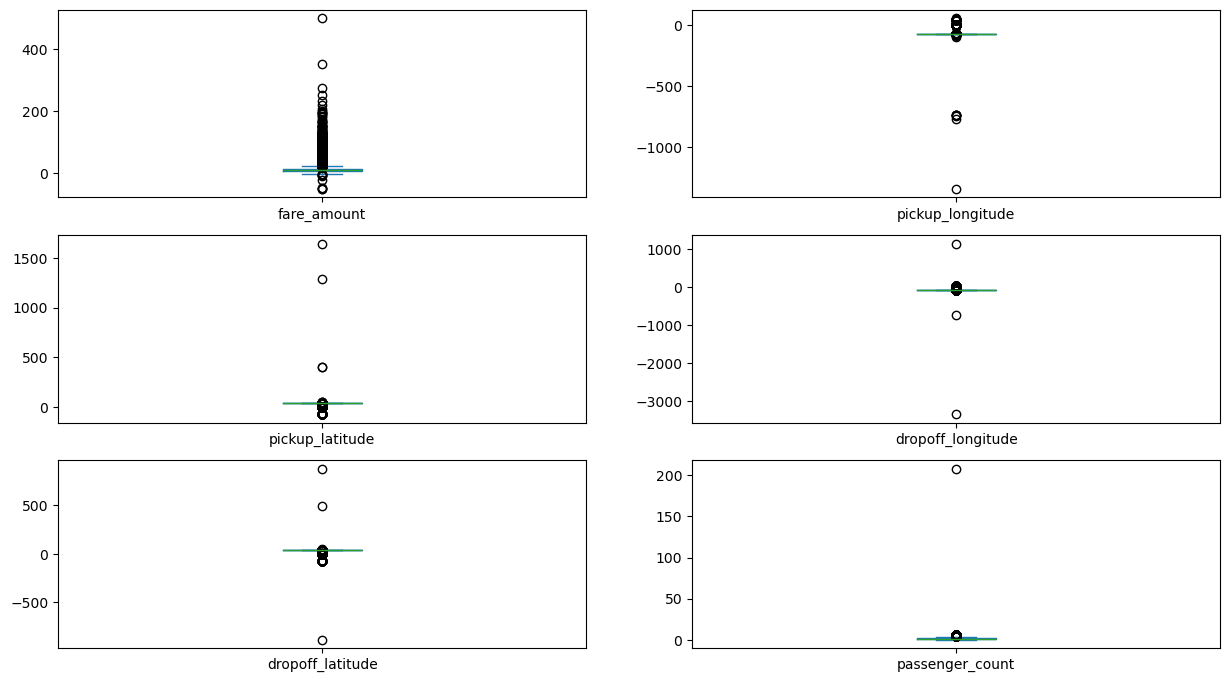

In [62]:
df.plot(kind="box",subplots=True, layout=(7, 2), figsize=(15, 20))

In [63]:
X = df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]
y = df['fare_amount']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [65]:
linar_regression = LinearRegression()
linar_regression.fit(X_train, y_train)

LinearRegression()

In [66]:
y_pred=linar_regression.predict(X_test)

In [67]:
r2_lr = r2_score(y_test, y_pred)

In [68]:
r2_lr

9.512702113356752e-06

In [69]:
rmse_lr = mean_squared_error(y_test, y_pred)

In [70]:
rmse_lr

97.50890938668378

In [72]:
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))

rmse_rf

9.87465996309158